<a href="https://colab.research.google.com/github/Itsmrk/Deep_learning/blob/master/14_Common_Patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setup**

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def plot_series(time, series, format="-",start=0, end= None , label = None):
  plt.plot(time[start:end], series[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Vale")

  if label:
    plt.legend(fontsize = 14)
  plt.grid(True)

# **Trend and Seasonality**

In [0]:
def trend(time, slope=0):
  return slope * time

Let's create a time series that just trends upward:

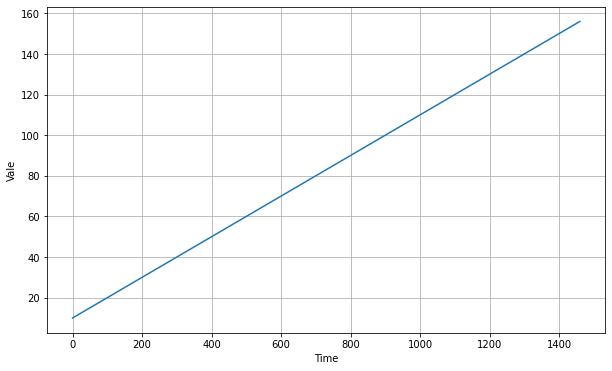

In [10]:
time = np.arange(4*365 +1)
baseline = 10 
series = baseline + trend(time, 0.1)

plt.figure(figsize=(10,6))
plot_series(time, series)
plt.show()

In [11]:
time

array([   0,    1,    2, ..., 1458, 1459, 1460])

In [12]:
series

array([ 10. ,  10.1,  10.2, ..., 155.8, 155.9, 156. ])

Now let's generate a time series with a seasonal pattern:

In [0]:
def seasonal_pattern(season_time):
  """Just an arbitrary pattern, you can change it if you wish"""
  return np.where(season_time < 0.4,
                  np.cos(season_time *2 * np.pi),
                  1/ np.exp(3 * season_time))
  
def seasonality(time, period, amplitude=1, phase=0):
  """Repeats the same pattern at each period"""
  season_time = ((time + phase) % period) / period
  return amplitude * seasonal_pattern(season_time)

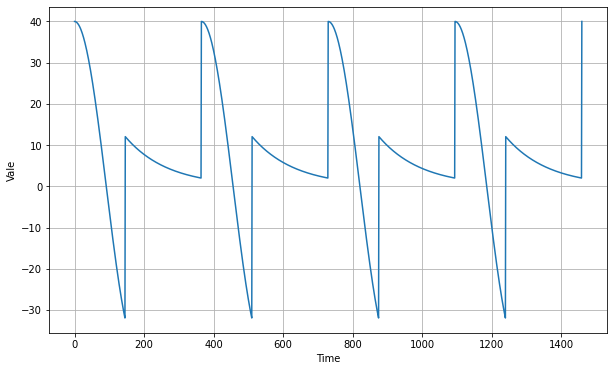

In [15]:
amplitude = 40 
series = seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

Now let's create a time series with both trend and seasonality:

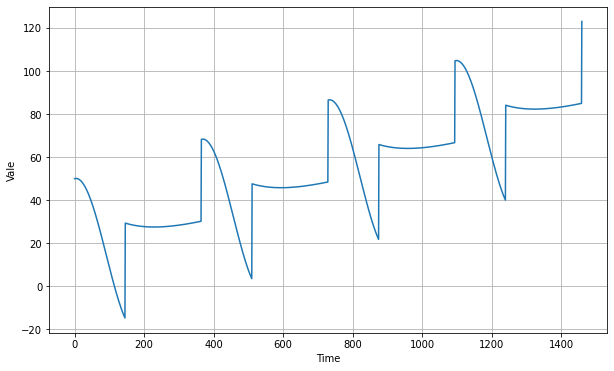

In [17]:
slope = 0.05
series = baseline + trend(time,slope)+ seasonality(time, period=365, amplitude = amplitude)

plt.figure(figsize=(10,6))
plot_series(time, series)
plt.show()

# Noise

In [0]:
def white_noise(time, nosie_leve=1 , seed = None):
  rnd = np.random.RandomState(seed)
  return rnd.rand(len(time)) * noise_level

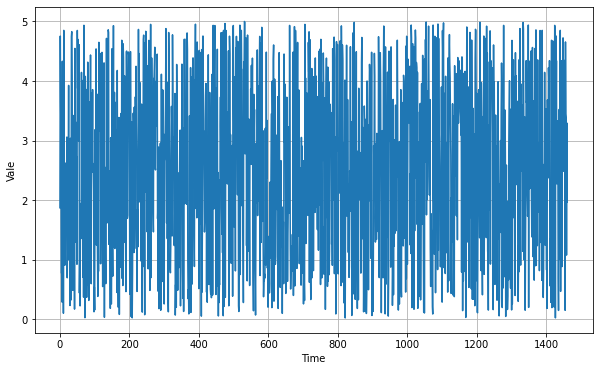

In [21]:
noise_level = 5
noise = white_noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, noise)
plt.show()

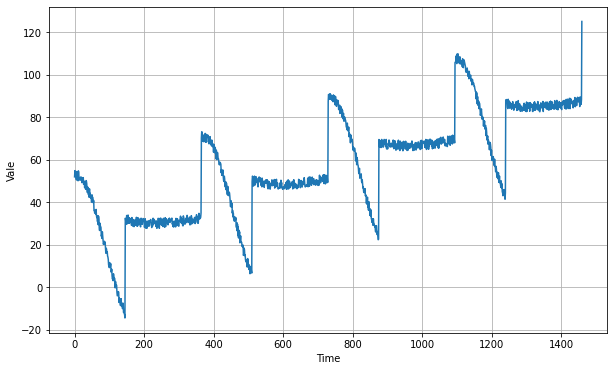

In [22]:
series += noise

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()